<a href="https://colab.research.google.com/github/rominicky/mineria-texto-python/blob/main/ulrich_exploraciones_textuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis textual de texto [Comentarios de Álvar Núñez Cabeza de Vaca](https://github.com/rominicky/comentarios-cabeza-de-vaca)

#### Por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

# Análisis textual de texto [Comentarios de Álvar Núñez Cabeza de Vaca](https://github.com/rominicky/comentarios-cabeza-de-vaca)

### Por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

Esta notebook tiene como objetivo analizar el texto en formato plano elaborado para el proyecto [Comentarios de Álvar Núñez Cabeza de Vaca](https://github.com/rominicky/comentarios-cabeza-de-vaca). El propósito es generar visualizaciones basadas en el análisis textual, mediante tareas de limpieza, segmentación, estudio de frecuencia léxica, visualización y extracción de entidades. A través de estos procedimientos, se busca explorar las relaciones entre personajes, pueblos originarios mencionados a lo largo del trayecto y episodios narrados en esta crónica.

Para ello se emplearán diversas bibliotecas, entre ellas: [spaCy](https://spacy.io/), [NLTK](https://www.nltk.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/). A lo largo del código se incluye una breve descripción de cada una de ellas y su aplicación específica en el análisis.

### Instalación y activación de librerías y módulos

In [3]:
# SpaCy: librería para procesamiento de lenguaje natural
!pip install spacy
# NLTK: librería para procesamiento de lenguaje natural
!pip install nltk
# Pandas: librería para manipulación y análisis de datos
!pip install pandas
# Matplotlib, Seaborn, Plotly: librerías para generar visualizaciones
!pip install matplotlib seaborn plotly
# Requests: librería para realizar solicitudes HTTP
# BeautifulSoup: librería para extraer datos de archivos HTML y XML
!pip install requests beautifulsoup4

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------  9.4/9.6 MB 53.3 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 46.2 MB/s eta 0:00:00


In [4]:
#Descarga del modelo de entrenamiento y procesado de textos para el español, md indica modelo de tamaño mediano
!python -m spacy download es_core_news_lg 

     ---------------------------------------- 0.0/568.0 MB ? eta -:--:--
      ------------------------------------- 10.5/568.0 MB 59.4 MB/s eta 0:00:10
     - ------------------------------------ 22.0/568.0 MB 51.6 MB/s eta 0:00:11
     - ------------------------------------ 29.6/568.0 MB 48.1 MB/s eta 0:00:12
     -- ----------------------------------- 39.6/568.0 MB 46.6 MB/s eta 0:00:12
     --- ---------------------------------- 49.0/568.0 MB 46.6 MB/s eta 0:00:12
     --- ---------------------------------- 58.7/568.0 MB 46.8 MB/s eta 0:00:11
     ---- --------------------------------- 67.9/568.0 MB 46.0 MB/s eta 0:00:11
     ----- -------------------------------- 77.3/568.0 MB 46.1 MB/s eta 0:00:11
     ----- -------------------------------- 86.0/568.0 MB 45.7 MB/s eta 0:00:11
     ------ ------------------------------- 95.4/568.0 MB 45.4 MB/s eta 0:00:11
     ------ ------------------------------ 104.9/568.0 MB 45.5 MB/s eta 0:00:11
     ------- ----------------------------- 113.

In [5]:
# WordCloud: librería para generar nubes de palabras
!pip install wordcloud

In [6]:
#Librerías y módulos para generar visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#Requests librería para importar url
import requests
# Re y BeautifulSoup para extraer datos de archivos HTML y XML
from bs4 import BeautifulSoup
import re
#NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Carga del texto desde GitHub

In [8]:
#función para descardar desde una url y con advertencia si existe error en el sitio web
def download_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Excepciones por error de acceso
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error de descarga de la URL: {e}")
        return None

url = "https://raw.githubusercontent.com/rominicky/comentarios-cabeza-de-vaca/refs/heads/main/assets/downloads/comentarios.txt"
comentarios_txt = download_text_from_url(url)

if comentarios_txt:
    print(comentarios_txt[:400])

else:
    print("Error al tratar de descargar el archivo") #advertencia que no se puedo descargar el archivo


COMENTARIOS

Cabeza de Vaca, adelantado y gobernador del Río de la Plata

Escriptos por Pero Hernández, escribano y secretario de la provincia, y dirigidos al serenísimo, muy alto y muy poderoso señor el Infante Don Carlos N. S.

INDICE:

CAPÍTULO I
De los comentarios de Alvar Núñez Cabeza de Vaca

CAPÍTULO II
De cómo partimos de la isla de Cabo Verde

CAPÍTULO III
Que trata de cómo el gobernador 


In [9]:
""" # Otra alternativa es cargar el texto desde una ruta relativa
with open(r'C:\~\downloads\comentarios.txt', 'r', encoding='utf-8') as f:
    comentarios_txt = f.read()

# Imprimir los primeros 500 caracteres
print(comentarios_txt[:500]) """

" # Otra alternativa es cargar el texto desde una ruta relativa\nwith open(r'C:\\~\\downloads\\comentarios.txt', 'r', encoding='utf-8') as f:\n    comentarios_txt = f.read()\n\n# Imprimir los primeros 500 caracteres\nprint(comentarios_txt[:500]) "

### Limpieza y tokenización del texto


A las palabras vacías, stopwords, generales del idioma español se añadieron las más frecuentes que se pueden considerar a una primera vista del texto, denominadas 'stopwords del siglo XVI'.

In [10]:
# Recursos de NLTK, Natural Language Toolkit, librería que permite el procesamiento de lenguaje natural, con los modelos corpus y tokenize, se permite la descarga de palabras vacías y un separador en tokens de textos
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [54]:
#Opción de limpieza básica, con re, para eliminar caracteres especiales y números

import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

texto_limpio1 = clean_text(comentarios_txt)
print(texto_limpio1[:1000]) 

comentarios cabeza de vaca adelantado y gobernador del río de la plata escriptos por pero hernández escribano y secretario de la provincia y dirigidos al serenísimo muy alto y muy poderoso señor el infante don carlos n s indice capítulo i de los comentarios de alvar núñez cabeza de vaca capítulo ii de cómo partimos de la isla de cabo verde capítulo iii que trata de cómo el gobernador llegó con su armada a la isla de santa catalina que es en el brasil y desembarcó allí con su armada capítulo iv de cómo vinieron nuevos cristianos a la isla capítulo v de cómo el gobernador dio priesa a su camino capítulo vi de cómo el gobernador y su gente comenzaron a caminar por tierra adentro capítulo vii que trata de lo que pasó el gobernador y su gente por el camino y de la manera de la tierra capítulo viii de los trabajos que rescibió en el camino el gobernador y su gente y la manera de los pinos y pifias de aquellas tierras capítulo ix de cómo el gobernador y su gente se vieron con necesidad de ham

In [55]:
#Segunda forma de limpieza, con funciones con NLTK, para eliminar stopwords y tokenizar el texto
import unicodedata
# Función de normalización y eliminación de signos no útiles
def normalizar(texto):
    texto = unicodedata.normalize('NFKD', texto)
    return ''.join([c for c in texto if not unicodedata.combining(c)])

# Stopwords del siglo XVI
stopwords_siglo_XVI_raw = {
    'aquel', 'aquella', 'ansi', 'aquellos', 'aquelas', 'sino', 'assi', 'assí', 'así', 'aun',
    'à', 'á', 'ó', 'ò', 'i', 'o',
    'hast', 'dende', 'dixo', 'dixeron', 'dixieron',
    'desque', 'después', 'allí', 'día', 'porque', 'pues', 'otro', 'otros', 'tanto', 'todo', 'muy',
    'más', 'menos', 'era', 'fue', 'fueron', 'había', 'tenía', 'mandó', 'vino', 'dio', 'dijo',
    'CAPÍTULO', 'CAPITULO', 'CAPÍTULOS', 'ÍNDICE', 'INDICE', '\n\nCAPÍTULO V\nDe', '\n\nINDICE', '\n\n'
}

# Normalizamos todas las stopwords
stopwords_siglo_XVI = set([normalizar(p.lower()) for p in stopwords_siglo_XVI_raw])
nltk_stopwords = set([normalizar(p.lower()) for p in stopwords.words('spanish')])
stopwords_completas = nltk_stopwords.union(stopwords_siglo_XVI)

# Función auxiliar: normalizar tildes y eliminar signos no útiles
def normalizar(texto):
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join([c for c in texto if not unicodedata.combining(c)])
    return texto

# Función de limpieza del texto, se utiliza expresiones regulares para encontrar y eleminar determinadas cadenas de caracteres
def limpiar_texto(texto):
    texto = texto.lower()
    texto = normalizar(texto)
    texto = re.sub(r'ÍNDICE|CAP[ÍI]TULO\s+[XLIVC\d]+\s*[\w\s]*', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.lower().split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas and len(palabra) > 2] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

# Función para limpiar y tokenizar
def clean_and_tokenize(text):
    # Eliminar caracteres especiales y tokenizar
    text = normalizar(text)
    tokens = word_tokenize(re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ]', ' ', text.lower()))
    # Filtrar stopwords
    tokens = [word for word in tokens if word not in stopwords_completas and len(word) > 2]
    return tokens

In [56]:
#carga de texto para limpieza
text = comentarios_txt
texto_limpio = limpiar_texto(text)

""" # Guarda el texto limpio
with open('texto_limpio.txt', 'w', encoding='utf-8') as file:
    file.write(texto_limpio)
 """
print("Archivo 'texto_limpio.txt' creado exitosamente.")
print(texto_limpio[:1000])

Archivo 'texto_limpio.txt' creado exitosamente.
comentarios cabeza vaca adelantado gobernador rio plata escriptos hernandez escribano secretario provincia dirigidos serenisimo alto poderoso senor infante don carlos brasil desembarco armada manera pinos pifias aquellas tierras remediaron gusanos sacaban unas canas salvar mal paso salto rio hacia llevo tierra canoas legua fuerza brazos cristianos espanoles iba socorrer tornasen poblar comen rio ahogaron dos cristianos yendo siguiendo enemigos avisado gobernador iban delante envio llamar hechas paces guaycurues entrego prisioneros parescer religiosos capitanes oficiales majestad capitan ribera aqui prendieron tomaban fuerza haciendas ano vinieron corte majestad personas rio plata dar cuenta majestad suceso armada enviado don pedro mendoza trabajos escaparon suplicar servido proveer socorrer peresciesen quedaban pocos sabido majestad tomase cierto asiento capitulacion alvar nunez cabeza vaca socorrellos asiento capitulacion efectuo mediant

In [50]:
texto = comentarios_txt
# Aplicar la función clean_and_tokenize
tokens = clean_and_tokenize(texto)

""" # Guardar los tokens en un archivo (como texto o como lista)
with open("comentarios_tokens.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(" ".join(tokens))  # Los tokens se guardan como texto
 """
print("Tokens guardados en 'comentarios_tokens.txt'.")
print(tokens[:25])

Tokens guardados en 'comentarios_tokens.txt'.
['comentarios', 'cabeza', 'vaca', 'adelantado', 'gobernador', 'rio', 'plata', 'escriptos', 'hernandez', 'escribano', 'secretario', 'provincia', 'dirigidos', 'serenisimo', 'alto', 'poderoso', 'senor', 'infante', 'don', 'carlos', 'comentarios', 'alvar', 'nunez', 'cabeza', 'vaca']


In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
import spacy
import pandas as pd

nltk.download('punkt')  # Recursos para la tokenización
nltk.download('averaged_perceptron_tagger')  # Modelo para el etiquetado POS
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_lg")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [57]:
# Procesamiento con SpaCy
doc = nlp(texto)

# lista de tuplas (palabra, etiqueta POS)
datos = [(token.text, token.pos_) for token in doc]

# Conversión de la lista en un dataframe
df = pd.DataFrame(datos, columns=["Palabra", "Etiqueta_POS"])

# Guardado del DataFrame en CSV
#df.to_csv("etiquetas_pos_comentarios.csv", index=False, encoding="utf-8")

#print("Archivo CSV generado con éxito: etiquetas_pos_comentarios.csv")

print(df.head(20))

        Palabra Etiqueta_POS
0   COMENTARIOS         NOUN
1          \n\n        SPACE
2        Cabeza        PROPN
3            de          ADP
4          Vaca        PROPN
5             ,        PUNCT
6    adelantado          ADJ
7             y        CCONJ
8    gobernador         NOUN
9           del          ADP
10          Río        PROPN
11           de          ADP
12           la          DET
13        Plata        PROPN
14         \n\n        SPACE
15    Escriptos        PROPN
16          por          ADP
17         Pero        CCONJ
18    Hernández        PROPN
19            ,        PUNCT


In [58]:
# Procesamiento con SpaCy
doc = nlp(texto_limpio1)

# lista de tuplas (palabra, etiqueta POS)
datos1 = [(token.text, token.pos_) for token in doc]

# Conversión de la lista en un dataframe
df1 = pd.DataFrame(datos1, columns=["Palabra", "Etiqueta_POS"])

# Guardado del DataFrame en CSV
#df.to_csv("etiquetas_pos_comentarios.csv", index=False, encoding="utf-8")

#print("Archivo CSV generado con éxito: etiquetas_pos_comentarios.csv")

print(df1.head(20))

        Palabra Etiqueta_POS
0   comentarios         NOUN
1        cabeza         NOUN
2            de          ADP
3          vaca         NOUN
4    adelantado          ADJ
5             y        CCONJ
6    gobernador         NOUN
7           del          ADP
8           río         NOUN
9            de          ADP
10           la          DET
11        plata         NOUN
12    escriptos          ADJ
13          por          ADP
14         pero        CCONJ
15    hernández        PROPN
16    escribano        PROPN
17            y        CCONJ
18   secretario         NOUN
19           de          ADP


### Cálculo de etiquetas POS

In [59]:
# Calculo de la cantidad de cada tipo de etiqueta POS
pos_counts = df['Etiqueta_POS'].value_counts()
pos_counts

Etiqueta_POS
NOUN     10452
ADP       9000
DET       7957
VERB      7808
PRON      6035
PUNCT     6010
CCONJ     4710
ADJ       2350
ADV       2112
AUX       2020
SCONJ     1878
PROPN     1850
NUM        635
SPACE      424
INTJ         3
PART         1
SYM          1
Name: count, dtype: int64

In [60]:
# Calculo de la cantidad de cada tipo de etiqueta POS
pos_counts1 = df1['Etiqueta_POS'].value_counts()
pos_counts1

Etiqueta_POS
NOUN     11083
ADP       9004
DET       7983
VERB      7856
PRON      6003
CCONJ     4706
ADJ       2460
ADV       2119
AUX       2028
SCONJ     1891
PROPN     1065
NUM        558
SYM          3
INTJ         3
PUNCT        2
PART         1
Name: count, dtype: int64

### Cálculo de sustantivos, adjetivos y verbos más comunes según etiquetado POS

In [61]:
# Función que trae palabras más frecuentes con etiqueta POS
def get_top_n_words(df, pos_tag, n=20):
    words = df[df['Etiqueta_POS'] == pos_tag]['Palabra'].value_counts().head(n)
    return words

# Más frecuentes según categoría gramatical
top_nouns = get_top_n_words(df, 'NOUN')
top_adjectives = get_top_n_words(df, 'ADJ')
top_verbs = get_top_n_words(df, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns)
print("\nAdjetivos más frecuentes:\n", top_adjectives)
print("\nVerbos más frecuentes:\n", top_verbs)


Sustantivos más frecuentes:
 Palabra
indios         634
tierra         482
gobernador     462
gente          275
río            231
cristianos     152
puerto         146
camino         136
día            129
días           119
españoles      110
guerra          90
bastimentos     88
generación      77
ciudad          76
oficiales       73
parte           73
tiempo          71
canoas          69
amigos          67
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
gran           111
grandes         78
naturales       77
dicho           65
principal       64
principales     51
grande          43
buena           32
mayor           29
buen            28
dichos          25
buenos          24
CAPÍTULO        24
contentos       22
juntos          21
cargados        21
guaycurúes      18
guaraníes       16
dicha           16
natural         15
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
hacer       142
mandó       132
tenían      107
dar          85
ansí         84
ti

In [62]:
# Más frecuentes según categoría gramatical
top_nouns1 = get_top_n_words(df1, 'NOUN')
top_adjectives1 = get_top_n_words(df1, 'ADJ')
top_verbs1 = get_top_n_words(df1, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns1)
print("\nAdjetivos más frecuentes:\n", top_adjectives1)
print("\nVerbos más frecuentes:\n", top_verbs1)

Sustantivos más frecuentes:
 Palabra
indios         633
tierra         488
gobernador     462
gente          275
río            231
majestad       175
cristianos     169
puerto         146
camino         136
día            129
capítulo       121
días           119
españoles      106
guerra          90
bastimentos     88
generación      77
ciudad          76
parte           73
oficiales       72
tiempo          71
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
gran           113
grandes         78
naturales       77
principal       64
dicho           63
principales     51
grande          43
buena           32
mayor           29
buen            28
guaraníes       27
buenos          25
dichos          25
contentos       22
cargados        21
juntos          21
guaycurúes      19
alegres         16
españoles       16
dicha           16
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
hacer       142
mandó       132
tenían      107
ansí         88
dar          85
ti

In [63]:
#Cálculo de nombres y lugares en el texto 
import spacy

#Realizo una limpieza especial para NER
def limpiar_texto2(texto):
    texto = normalizar(texto)
    texto = re.sub(r'INDICE|ÍNDICE|CAP[ÍI]TULO\s+[XLIVC\d]+\s*[\w\s]*', '', texto, flags=re.IGNORECASE)
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas and len(palabra) > 2] #se filtran las palabras que coinciden con stopwords
    return " ".join(palabras_filtradas)

#función para encontrar nombre de personas y lugares
def find_names_and_places(text, language="es"):
    if language == "es":
        doc = nlp_es(text)
    else:
        raise ValueError("Error de idioma")

    names = []
    places = []
    for ent in doc.ents:
        if ent.label_ == "PER":
            names.append(ent.text)
        elif ent.label_ == "LOC" or ent.label_ == "GPE":
            places.append(ent.text)

    return names, places


text = limpiar_texto2(comentarios_txt)

#aplico la funcion al texto
spanish_names, spanish_places = find_names_and_places(text, language="es")

print("Nombres", spanish_names[:25])
print("Lugares:", spanish_places[:25])


Nombres ['Hernandez', 'senor Infante Don Carlos', 'Majestad capitan Ribera', 'Pedro Mendoza', 'Majestad', 'Alvar Nunez Cabeza Vaca', 'Cabeza Vaca', 'Majestad', 'Alvar Nunez', 'Majestad', 'murio ningun', 'porne aqui', 'Majestad', 'Santa Catalina', 'Majestad', 'Bernaldo Armenta natural Cordoba', 'Alonso Lebron', 'Felipe Caceres', 'Pedro Mendoza', 'Juan Ayolas', 'Pedro Mendoza', 'Domingo Irala vizcaino', 'Juan Ayolas', 'Juan Ayolas', 'Domingo Irala']
Lugares: ['Rio Plata', 'corte Majestad', 'Rio Plata', 'capitania general tierra', 'Sevilla', 'Canaria', 'Cadiz', 'isla Palma', 'Cabo Verde', 'isla Santiago', 'Espana', 'Palma isla Cabo Verde', 'Indias', 'Cananea pasado Cabo Frio', 'partio paso rio bahia', 'San Francisco', 'Cananea', 'San Francisco', 'isla Santa Catalina', 'Brasil', 'isla Santa Catalina', 'Espana', 'Rio Plata', 'Cananea', 'Brasil']


# Gráficos

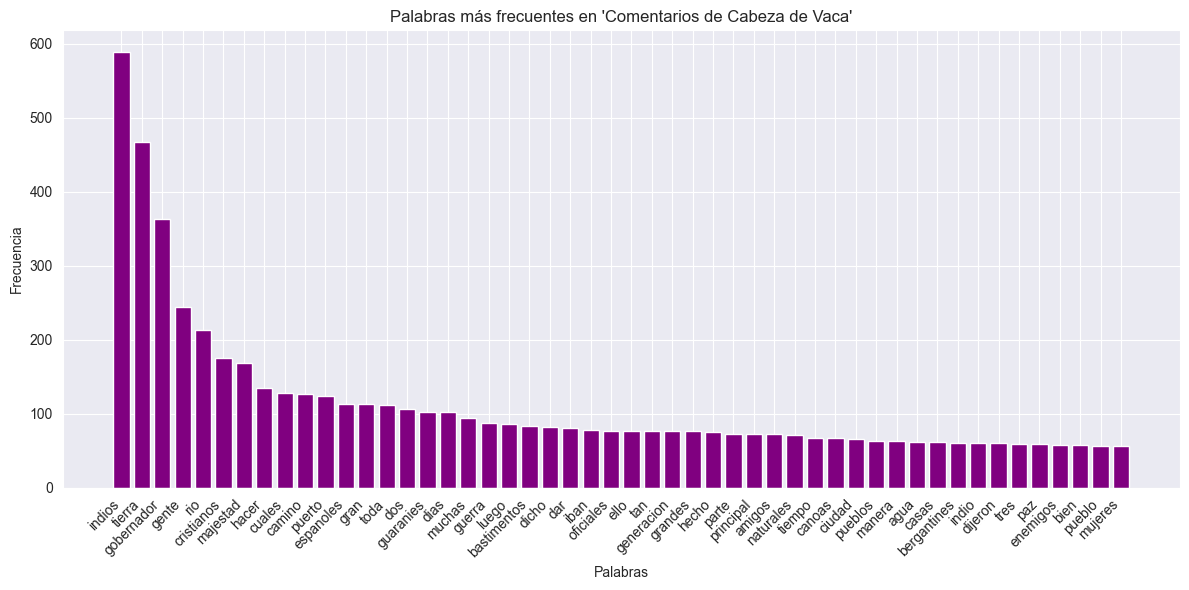

In [64]:
# Gráfico de palabas más frecuentes en texto que fue procesado mediante limpieza

import matplotlib.pyplot as plt
from collections import Counter

""" # Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Tokenización
palabras = texto_limpio.split()

# Cálcilo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='purple')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Comentarios de Cabeza de Vaca'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

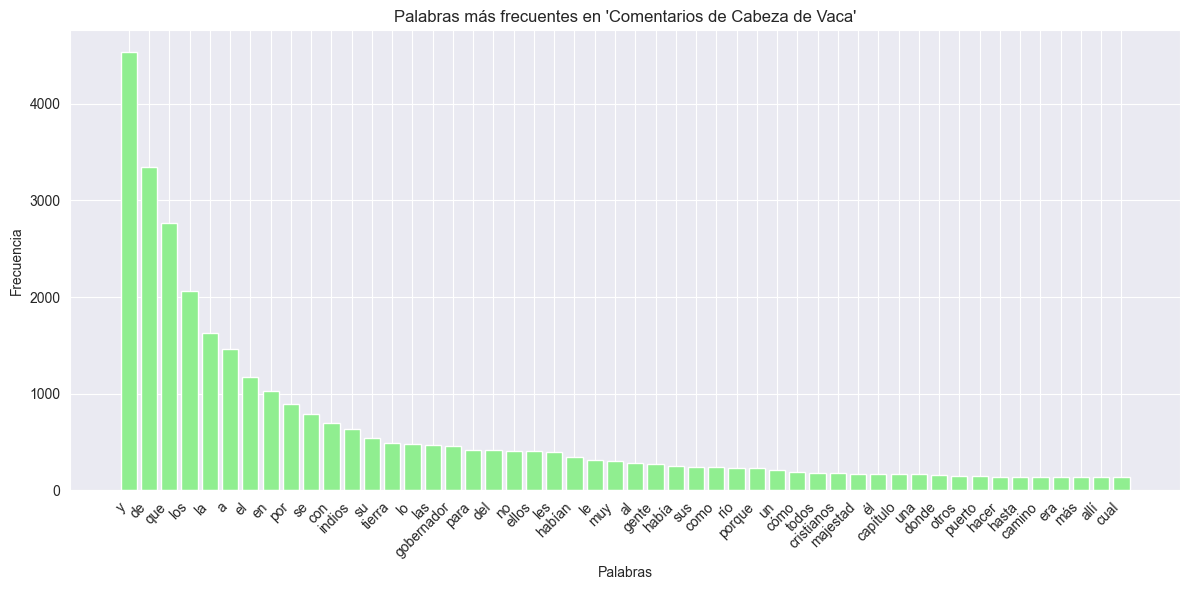

In [65]:
# Gráfico de palabas más frecuentes en texto que fue procesado mediante limpieza

import matplotlib.pyplot as plt
from collections import Counter

""" # Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Tokenización
palabras = texto_limpio1.split()

# Cálcilo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='lightgreen')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Comentarios de Cabeza de Vaca'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

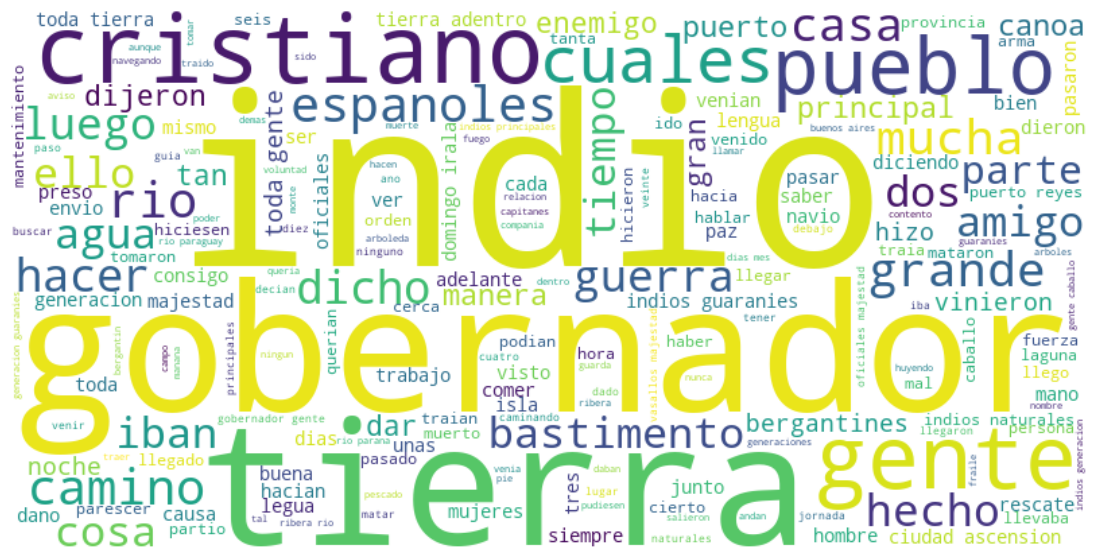

In [66]:
# Nube de palabras

from wordcloud import WordCloud
import matplotlib.pyplot as plt

""" # Lee el texto
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read() """

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

# Muestra la nube de palabras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

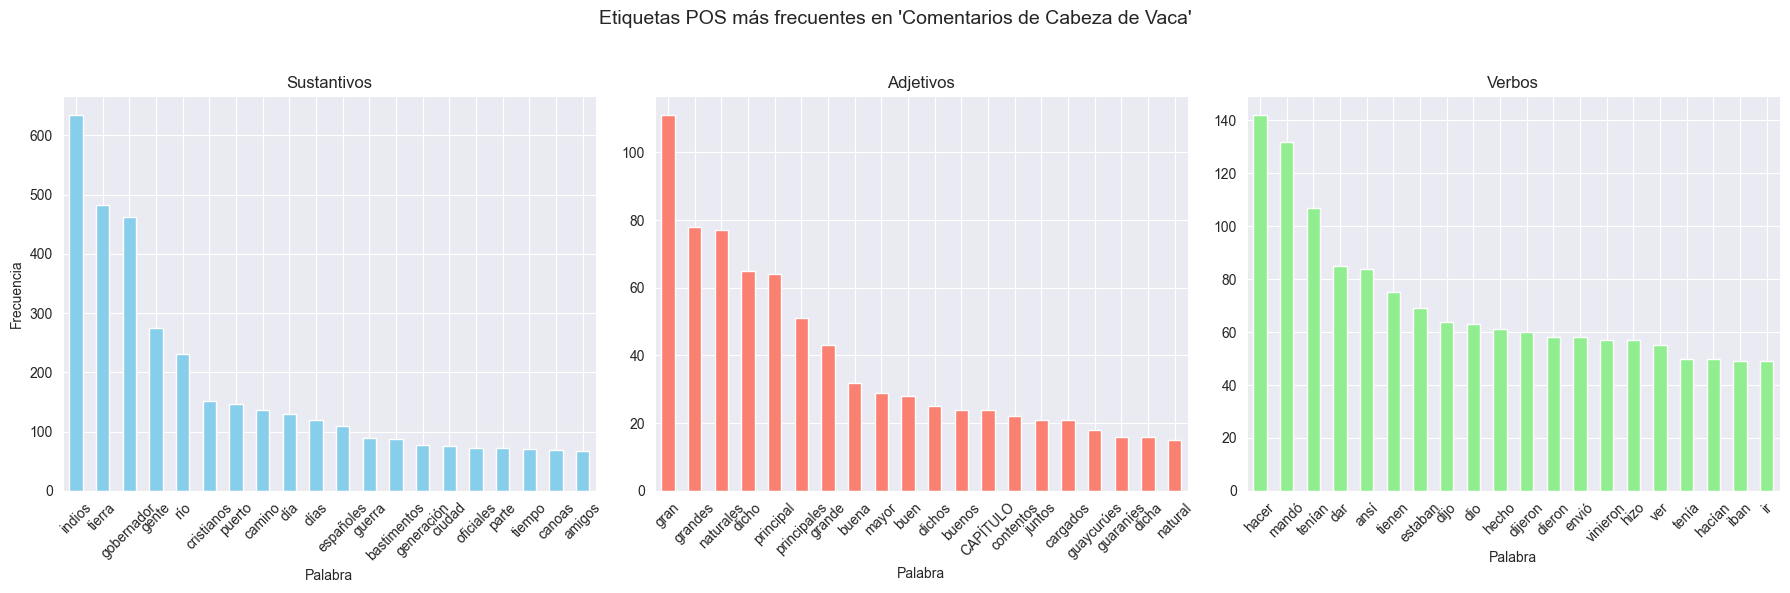

In [67]:
sns.set_style("darkgrid")

# Tamaño de la figura
plt.figure(figsize=(18, 6))
plt.suptitle("Etiquetas POS más frecuentes en 'Comentarios de Cabeza de Vaca'", fontsize=14)

# Gráfico de Sustantivos
ax1 = plt.subplot(1, 3, 1)
top_nouns.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Sustantivos', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de Adjetivos
ax2 = plt.subplot(1, 3, 2)
top_adjectives.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Adjetivos', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Gráfico de Verbos
ax3 = plt.subplot(1, 3, 3)
top_verbs.plot(kind='bar', color='lightgreen', ax=ax3)
ax3.set_title('Verbos', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

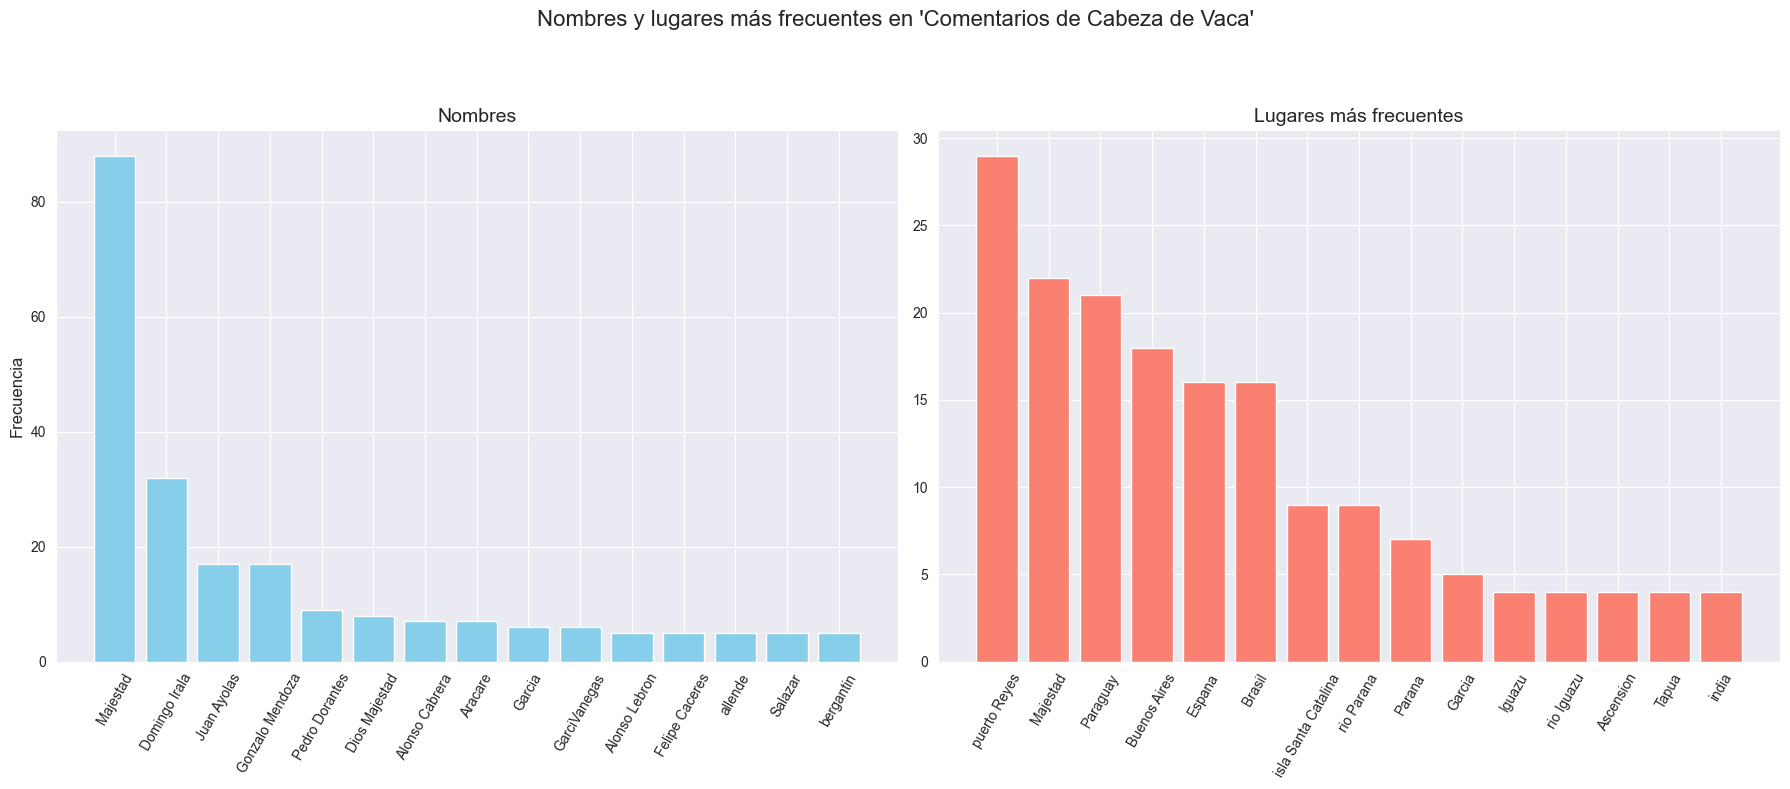

In [68]:
from collections import Counter
import matplotlib.pyplot as plt

# Cálculo de la frecuencia de nombres y lugares
name_counts = Counter(spanish_names)
place_counts = Counter(spanish_places)

#Listas para graficar
names, name_freqs = zip(*name_counts.most_common(15))
places, place_freqs = zip(*place_counts.most_common(15))

# Tamaño de la figura
plt.figure(figsize=(18, 8))
plt.suptitle("Nombres y lugares más frecuentes en 'Comentarios de Cabeza de Vaca'", fontsize=16)

# Gráfico de Nombres
ax1 = plt.subplot(1, 2, 1)
ax1.bar(names, name_freqs, color='skyblue', width=0.8)
ax1.set_title('Nombres', fontsize=14)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.tick_params(axis='x', rotation=60, labelsize=10)

# Gráfico de Lugares
ax2 = plt.subplot(1, 2, 2)
ax2.bar(places, place_freqs, color='salmon', width=0.8)
ax2.set_title('Lugares más frecuentes', fontsize=14)
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [27]:
import re
from collections import Counter

# Simplificá el texto a minúsculas
text = limpiar_texto(comentarios_txt)

# Buscá las menciones
vaca_menciones = re.findall(r'\b(cabeza de vaca|adelantado|gobernador)\b', text)
irala_menciones = re.findall(r'\b(irala|domingo martínez de irala|capitán irala|domingo irala|domingo de irala|martinez de irala)\b', text)

print("Menciones de Cabeza de Vaca:", len(vaca_menciones))
print("Menciones de Irala:", len(irala_menciones))

# Extraer oraciones donde se mencione a Vaca o Irala
oraciones_vaca = [sent.text for sent in doc.sents if "vaca" in sent.text.lower() or "gobernador" in sent.text.lower() or "adelantado" in sent.text.lower()]
oraciones_irala = [sent.text for sent in doc.sents if "irala" in sent.text.lower() or "domingo irala" in sent.text.lower() or "domingo de irala" in sent.text.lower()]

tokens_irala = []
for oracion in oraciones_irala:
    tokens_irala.extend(clean_and_tokenize(oracion))

tokens_vaca = []
for oracion in oraciones_vaca:
    tokens_vaca.extend(clean_and_tokenize(oracion))

""" tokens_irala = clean_and_tokenize(oraciones_irala)
tokens_vaca = clean_and_tokenize(oraciones_vaca) """

def contexto_palabra(tokens, palabra_objetivo, ventana=5):
    contexto = []
    for i, token in enumerate(tokens):
        if palabra_objetivo in token:
            inicio = max(0, i - ventana)
            fin = min(len(tokens), i + ventana + 1)
            contexto.append(tokens[inicio:fin])
    return contexto

# Frecuencias de palabras cerca de "irala" y "vaca"
cooc_irala = contexto_palabra(tokens_irala, "irala")
cooc_vaca = contexto_palabra(tokens_vaca, "gobernador")

from itertools import chain

print("\nPalabras cercanas a 'Domingo de Irala':")
# Flatten the list of contexts and count word frequencies
cooc_irala_flat = list(chain.from_iterable(cooc_irala))
cooc_irala_counter = Counter(cooc_irala_flat)
print(cooc_irala_counter.most_common(10))

print("\nPalabras cercanas a 'Cabeza de Vaca':")
cooc_vaca_flat = list(chain.from_iterable(cooc_vaca))
cooc_vaca_counter = Counter(cooc_vaca_flat)
print(cooc_vaca_counter.most_common(10))



Menciones de Cabeza de Vaca: 365
Menciones de Irala: 35

Palabras cercanas a 'Domingo de Irala':
[('domingo', 43), ('irala', 42), ('oficiales', 15), ('gobernador', 11), ('capitan', 8), ('indios', 7), ('tierra', 6), ('vizcaino', 5), ('luego', 5), ('hacer', 5)]

Palabras cercanas a 'Cabeza de Vaca':
[('gobernador', 510), ('indios', 121), ('gente', 102), ('tierra', 86), ('majestad', 48), ('rio', 45), ('oficiales', 39), ('puerto', 32), ('camino', 30), ('espanoles', 30)]


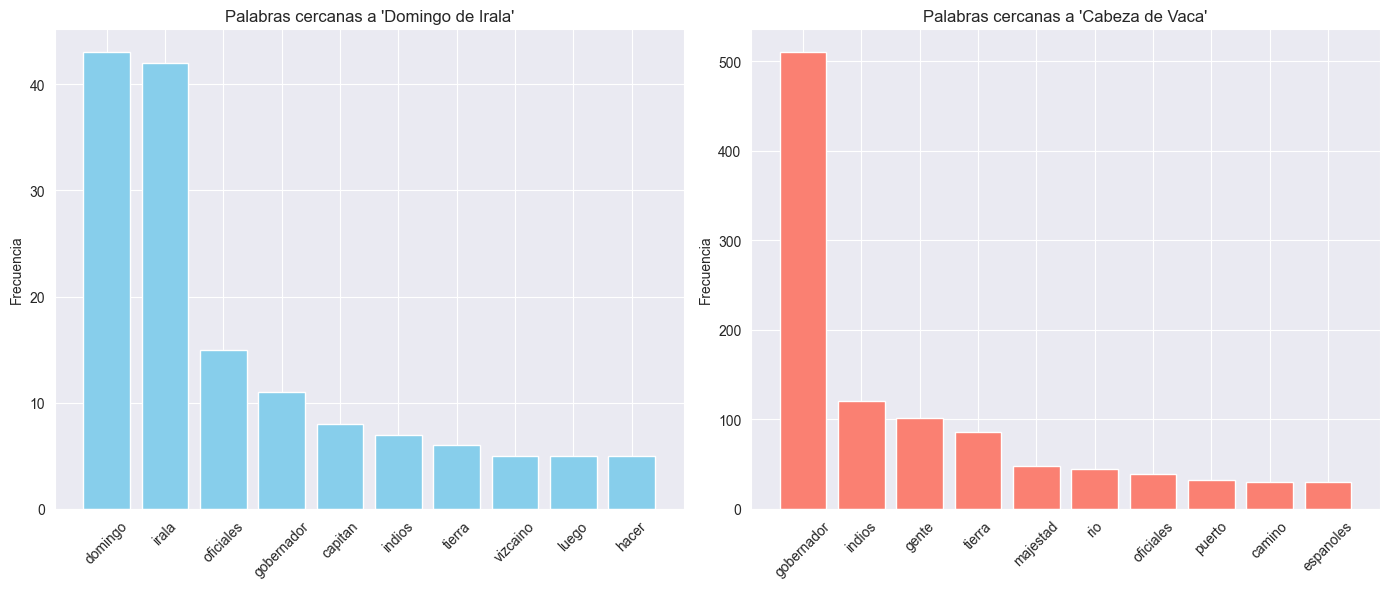

In [29]:
import matplotlib.pyplot as plt

# Selecciona las 10 palabras más frecuentes cerca de "irala" y "vaca"
top_irala = cooc_irala_counter.most_common(10)
top_vaca = cooc_vaca_counter.most_common(10)

# Desempaqueta palabras y frecuencias
words_irala, freqs_irala = zip(*top_irala)
words_vaca, freqs_vaca = zip(*top_vaca)

plt.figure(figsize=(14, 6))

# Gráfico para "irala"
plt.subplot(1, 2, 1)
plt.bar(words_irala, freqs_irala, color='skyblue')
plt.title("Palabras cercanas a 'Domingo de Irala'")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")

# Gráfico para "vaca"
plt.subplot(1, 2, 2)
plt.bar(words_vaca, freqs_vaca, color='salmon')
plt.title("Palabras cercanas a 'Cabeza de Vaca'")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()